<a href="https://colab.research.google.com/github/azzazhr/PCVK_Ganjil_2025/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama : Azzahra Attaqina**

**NIM : 2341720224**

**Kelas : TI-3B**

**MODUL 3 PCVK**

In [1]:
from google.colab import drive

#Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


/tmp/ipython-input-1290507567.py:24: RuntimeWarning: overflow encountered in scalar add
  brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)


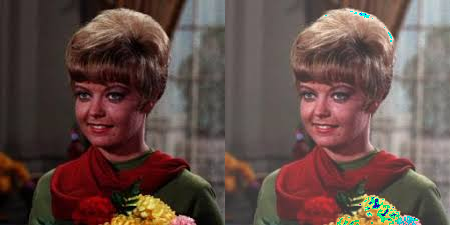

In [2]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')

try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')
    brightness = 0  # default

# Baca citra asli
original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.jpg')

# Membuat array kosong dengan ukuran dan tipe data sama
brightness_image = np.zeros(original.shape, original.dtype)

# Mengubah kecerahan per piksel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

# cara simple tanpa for loop :
# brightness_image = cv.convertScaleAbs(original, beta=brightness)

# Menggabungkan citra asli dan citra hasil
final_frame = cv.hconcat([original, brightness_image])

# Tampilkan di Colab
cv2_imshow(final_frame)


# **TUGAS**

**1. Terapkan invers gambar dalam kode Anda menggunakan rumus yang ditunjukkan pada subbagian latar belakang teoritis di atas, yang menghasilkan output seperti yang ditunjukkan pada gambar.**

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

TASK 1: Menerapkan Invers
-------------------------------------------------------


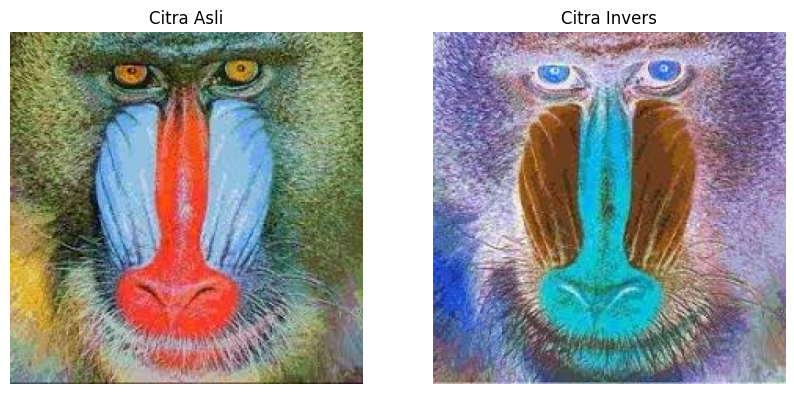

In [4]:
print("TASK 1: Menerapkan Invers")
print("-------------------------------------------------------")

# Baca citra
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/baboon.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Invers citra
inverse = 255 - img_rgb

# Tampilkan berdampingan
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Citra Asli")
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Citra Invers")
plt.imshow(inverse)
plt.axis('off')

plt.show()


**2. Implementasikan transformasi kontras di Google Collaboratory menggunakan rumus yang tertulis di bagian Latar Belakang Teoritis, dan berikan output yang ditunjukkan pada gambar.**

 TASK 2 : Mengubah kontras dan tingkat kecerahan citra
---------------------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 60
Masukkan kontras [1.0 - 3.0]: 1.5


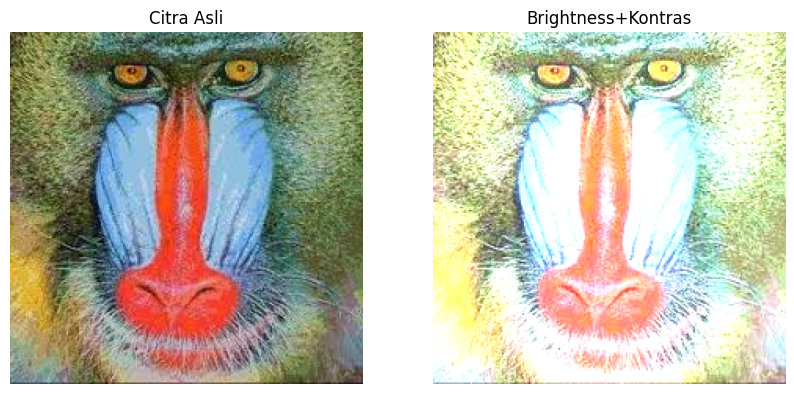

In [5]:
print(" TASK 2 : Mengubah kontras dan tingkat kecerahan citra")
print("---------------------------------------------")

# Input dari user
brightness = int(input("Masukkan tingkat kecerahan [-255 - 255]: "))
contrast = float(input("Masukkan kontras [1.0 - 3.0]: "))

# Baca citra
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/baboon.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Terapkan brightness dan contrast
adjusted = np.clip(contrast * img_rgb + brightness, 0, 255).astype(np.uint8)

# Tampilkan berdampingan
plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.title("Citra Asli"); plt.imshow(img_rgb); plt.axis('off')
plt.subplot(1,2,2); plt.title("Brightness+Kontras"); plt.imshow(adjusted); plt.axis('off')
plt.show()


**3. Implementasikan transformasi kecerahan logaritmik pada Google Colaboratory menggunakan rumus yang tertulis dalam Tinjauan Latar Belakang Teoritis, menghasilkan keluaran yang ditunjukkan pada gambar.**

TASK 3 : Mengubah tingkat kecerahan citra dengan Transformasi Log
--------------------------------------------------------
Masukkan nilai kecerahan: 40


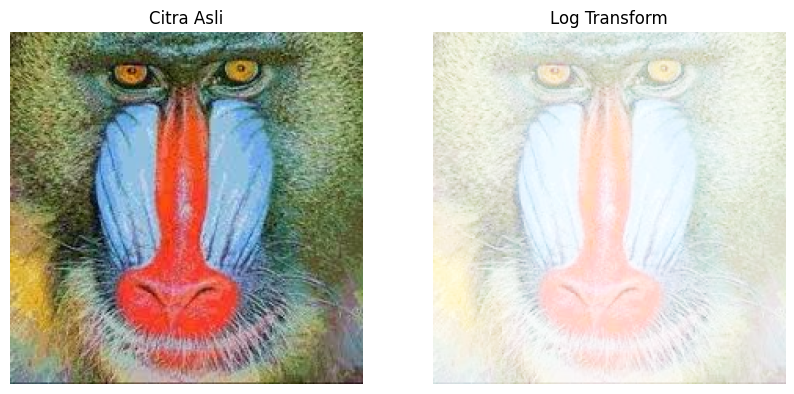

In [6]:
print("TASK 3 : Mengubah tingkat kecerahan citra dengan Transformasi Log")
print("--------------------------------------------------------")

# Input dari user
brightness = int(input("Masukkan nilai kecerahan: "))

# Baca citra
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/baboon.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Konversi ke float
img_float = img_rgb.astype(np.float32)

# Terapkan log transform dengan tambahan brightness
c = 255 / np.log(1 + np.max(img_float))
log_img = c * np.log(1 + img_float + brightness)
log_img = np.clip(log_img, 0, 255).astype(np.uint8)

# Tampilkan berdampingan
plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.title("Citra Asli"); plt.imshow(img_rgb); plt.axis('off')
plt.subplot(1,2,2); plt.title("Log Transform"); plt.imshow(log_img); plt.axis('off')
plt.show()


**4. Implementasikan transformasi skala abu-abu menggunakan metode rata-rata, kecerahan, dan luminansi di Google Colaboratory menggunakan rumus yang tertulis dalam Tinjauan Latar Belakang Teoritis, menghasilkan keluaran sebagai berikut:**

**a. Averaging**

TASK 4a: Grayscale dengan metode Averaging
--------------------------------------------


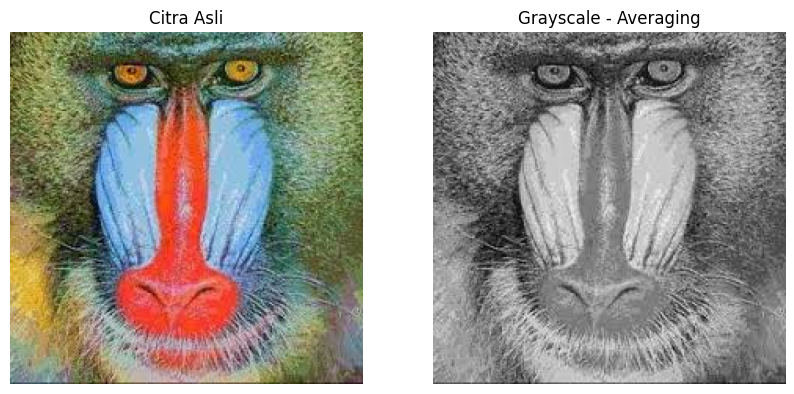

In [7]:
print("TASK 4a: Grayscale dengan metode Averaging")
print("--------------------------------------------")

# Baca citra
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/baboon.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Pisahkan channel
R, G, B = img_rgb[:,:,0], img_rgb[:,:,1], img_rgb[:,:,2]

# Averaging: (R + G + B)/3
gray_avg = ((R.astype(np.float32) + G.astype(np.float32) + B.astype(np.float32)) / 3).astype(np.uint8)

# Tampilkan
plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.title("Citra Asli"); plt.imshow(img_rgb); plt.axis('off')
plt.subplot(1,2,2); plt.title("Grayscale - Averaging"); plt.imshow(gray_avg, cmap='gray'); plt.axis('off')
plt.show()


**b. Lighness**

TASK 4b: Grayscale dengan metode Lightness
--------------------------------------------


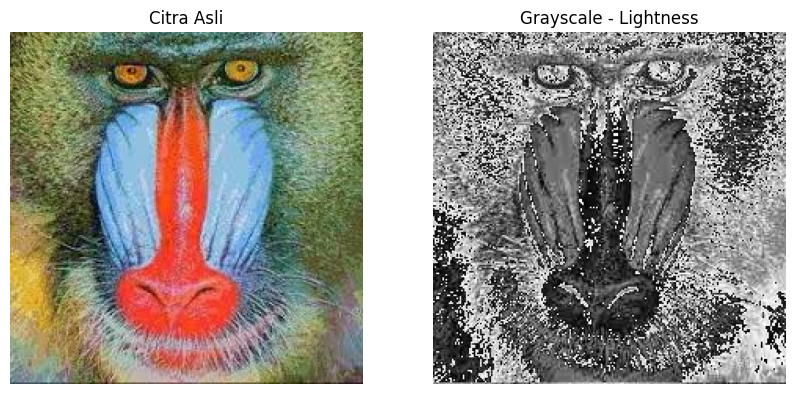

In [8]:
print("TASK 4b: Grayscale dengan metode Lightness")
print("--------------------------------------------")

# Baca citra
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/baboon.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Pisahkan channel
R, G, B = img_rgb[:,:,0], img_rgb[:,:,1], img_rgb[:,:,2]

# Lightness: (max(R,G,B) + min(R,G,B))/2
gray_lightness = ((np.maximum.reduce([R,G,B]) + np.minimum.reduce([R,G,B])) / 2).astype(np.uint8)

# Tampilkan
plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.title("Citra Asli"); plt.imshow(img_rgb); plt.axis('off')
plt.subplot(1,2,2); plt.title("Grayscale - Lightness"); plt.imshow(gray_lightness, cmap='gray'); plt.axis('off')
plt.show()


**c. Luminance**

TASK 4c: Grayscale dengan metode Luminance
--------------------------------------------


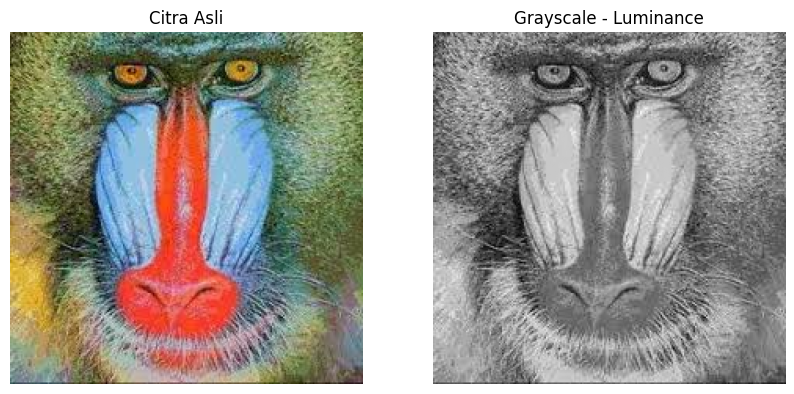

In [9]:
print("TASK 4c: Grayscale dengan metode Luminance")
print("--------------------------------------------")

# Baca citra
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/baboon.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Pisahkan channel
R, G, B = img_rgb[:,:,0], img_rgb[:,:,1], img_rgb[:,:,2]

# Luminance: 0.21R + 0.72G + 0.07B
gray_luminance = (0.21*R + 0.72*G + 0.07*B).astype(np.uint8)

# Tampilkan
plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.title("Citra Asli"); plt.imshow(img_rgb); plt.axis('off')
plt.subplot(1,2,2); plt.title("Grayscale - Luminance"); plt.imshow(gray_luminance, cmap='gray'); plt.axis('off')
plt.show()


**5. Tampilkan warna-warna tertentu dalam gambar, dan ubah warna lainnya menjadi skala abu-abu (grayscale). Contohnya, tampilkan warna biru pada gambar masukan dan ubah bagian lain yang tidak berwarna biru menjadi skala abu-abu seperti contoh**

TASK 5: Menampilkan hanya warna biru, lainnya grayscale
-------------------------------------------------------


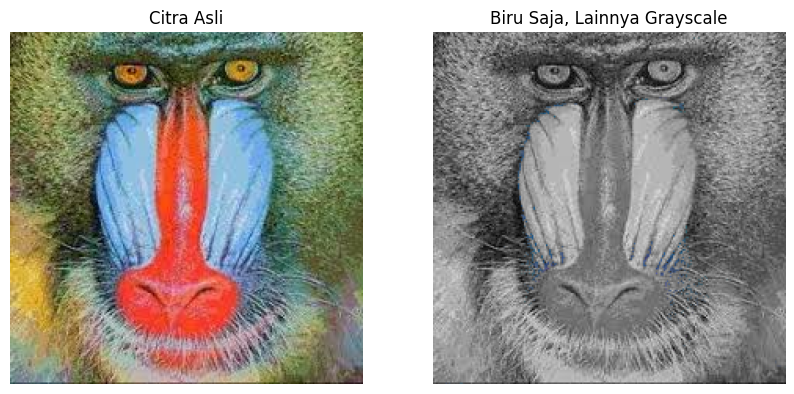

In [10]:

print("TASK 5: Menampilkan hanya warna biru, lainnya grayscale")
print("-------------------------------------------------------")

# Baca citra
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/baboon.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Konversi citra ke grayscale
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
gray_bgr = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)

# Definisikan range warna biru (bisa disesuaikan tergantung gambar)
lower_blue = np.array([0, 0, 100], dtype="uint8")
upper_blue = np.array([100, 100, 255], dtype="uint8")

# Buat mask (bagian biru akan bernilai 255, selainnya 0)
mask = cv2.inRange(img_rgb, lower_blue, upper_blue)

# Gabungkan: bagian biru pakai citra asli, lainnya pakai grayscale
result = np.where(mask[:,:,None] != 0, img_rgb, gray_bgr)

# Tampilkan hasil berdampingan
plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.title("Citra Asli"); plt.imshow(img_rgb); plt.axis('off')
plt.subplot(1,2,2); plt.title("Biru Saja, Lainnya Grayscale"); plt.imshow(result); plt.axis('off')
plt.show()
